<span style="background-color:#f6f8fa">last updated : 2022-Oct-24 / Yisak Kim (yisakk@snu.ac.kr)</span>

# 00_Explore_CheXpert
- **Dataset URL:** https://stanfordaimi.azurewebsites.net/datasets/8cbd9ed4-2eb9-4565-affc-111cf4f7ebe2
- You may find two different versions; **CheXpert-v1.0** and **CheXpert-v1.0-small**. The only differenec is the image size, so we're going to explore the **-small** version.

> ### Table of contents
> 1. [Directory Structure](#1)
> 2. [CSV files](#2)
> 3. [JPEG files](#3)

In [1]:
import os
import pandas as pd
from glob import glob

from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import random

## 1. Directory Structure <a name="1"></a>

In [2]:
!tree CheXpert-v1.0-small/ -L 1

CheXpert-v1.0-small/
├── train
├── train.csv
├── valid
└── valid.csv

2 directories, 2 files


In [3]:
!tree CheXpert-v1.0-small/train/patient00001

CheXpert-v1.0-small/train/patient00001
└── study1
    └── view1_frontal.jpg

1 directory, 1 file


In [4]:
!tree CheXpert-v1.0-small/train/patient00002

CheXpert-v1.0-small/train/patient00002
├── study1
│   ├── view1_frontal.jpg
│   └── view2_lateral.jpg
└── study2
    └── view1_frontal.jpg

2 directories, 3 files


## 2. CSV files <a name="2"></a>

In [5]:
def nan_count(df, col):
    return len(df)-sum(df[col].value_counts())

def valcounts_nan(df, col):
    print('NaN:', nan_count(df, col))
    print(df[col].value_counts())
    
def annotation_summary(df, annotations, ratio_view=False):
    summary_df = pd.DataFrame()
    annot_vals = [1.0, 0.0, -1.0]
    
    for annot in annotations:

        tmp = df[annot].value_counts()
        tmp_lst = []

        for annot_val in annot_vals:
            try:
                tmp_lst.append(tmp[annot_val])
            except KeyError:
                tmp_lst.append(0)

        tmp_lst.append(nan_count(df, annot))
        tmp_lst.append(sum(tmp_lst))
        summary_df[annot] = tmp_lst
        
    summary_df.index = annot_vals+['NaN', 'Total']
    summary_df['Total'] = [sum(summary_df.loc[x]) for x in annot_vals+['NaN', 'Total']]
    
    if ratio_view:
        ratio_df = pd.DataFrame(np.round(summary_df.values / summary_df.values[-1], 4)*100)
        ratio_df.columns = summary_df.columns
        ratio_df.index = summary_df.index
        return ratio_df
    
    else:
        return summary_df

In [6]:
small_dir = "CheXpert-v1.0-small"
train_df = pd.read_csv(os.path.join(small_dir, "train.csv"))
valid_df = pd.read_csv(os.path.join(small_dir, "valid.csv"))

org_dir = "CheXpert-v1.0"
org_train_df = pd.read_csv(os.path.join(org_dir, "train.csv"))
org_valid_df = pd.read_csv(os.path.join(org_dir, "valid.csv"))

In [7]:
train_df

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223409,CheXpert-v1.0-small/train/patient64537/study2/...,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,-1.0,0.0,1.0,NaN,NaN,NaN
223410,CheXpert-v1.0-small/train/patient64537/study1/...,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,0.0,-1.0,NaN,-1.0,NaN,NaN,NaN
223411,CheXpert-v1.0-small/train/patient64538/study1/...,Female,0,Frontal,AP,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223412,CheXpert-v1.0-small/train/patient64539/study1/...,Female,0,Frontal,AP,NaN,NaN,1.0,1.0,NaN,NaN,NaN,-1.0,1.0,0.0,NaN,NaN,NaN,0.0


In [8]:
valcounts_nan(train_df, 'Sex')
print()
valcounts_nan(train_df, 'Frontal/Lateral')
print()
valcounts_nan(train_df, 'AP/PA')

NaN: 0
Male       132636
Female      90777
Unknown         1
Name: Sex, dtype: int64

NaN: 0
Frontal    191027
Lateral     32387
Name: Frontal/Lateral, dtype: int64

NaN: 32387
AP    161590
PA     29420
LL        16
RL         1
Name: AP/PA, dtype: int64


<AxesSubplot:>

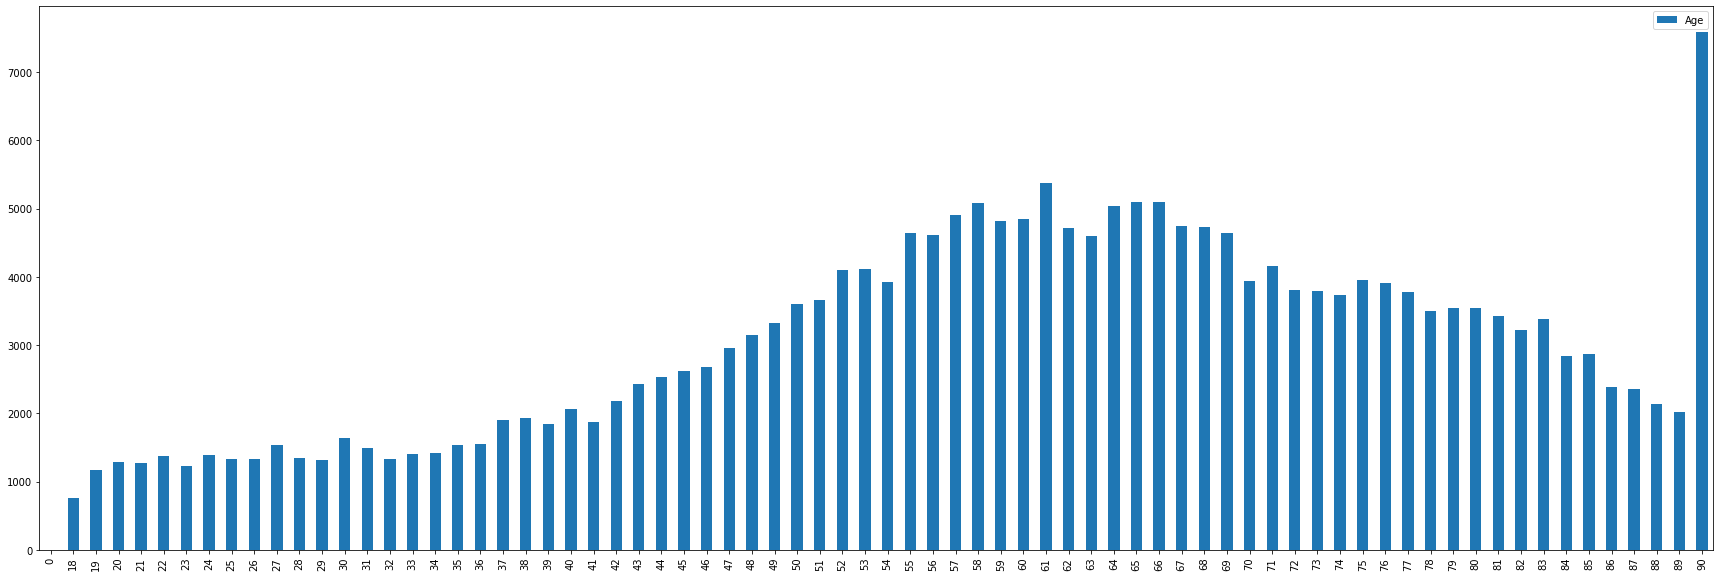

In [9]:
age_df = pd.DataFrame(train_df['Age'].value_counts())
age_df.sort_index().plot(kind='bar', figsize=(30,10))

In [10]:
annotations = train_df.columns[5:]
annotations

Index(['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly',
       'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia',
       'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 'Pleural Other',
       'Fracture', 'Support Devices'],
      dtype='object')

In [11]:
annotation_summary(train_df, annotations)

,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Total
1.0,22381,10798,27000,105581,9186,52246,14783,6039,33376,19448,86187,3523,9040,116001,515589
0.0,0,21638,11116,6599,1270,20726,28097,2799,1328,56341,35396,316,2512,6137,194275
-1.0,0,12403,8087,5598,1488,12984,27742,18770,33739,3145,11628,2653,642,1079,139958
NaN,201033,178575,177211,105636,211470,137458,152792,195806,154971,144480,90203,216922,211220,100197,2277974
Total,223414,223414,223414,223414,223414,223414,223414,223414,223414,223414,223414,223414,223414,223414,3127796


In [12]:
annotation_summary(train_df, annotations, ratio_view=True)

,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Total
1.0,10.02,4.83,12.09,47.26,4.11,23.39,6.62,2.70,14.94,8.70,38.58,1.58,4.05,51.92,16.48
0.0,0.00,9.69,4.98,2.95,0.57,9.28,12.58,1.25,0.59,25.22,15.84,0.14,1.12,2.75,6.21
-1.0,0.00,5.55,3.62,2.51,0.67,5.81,12.42,8.40,15.10,1.41,5.20,1.19,0.29,0.48,4.47
NaN,89.98,79.93,79.32,47.28,94.65,61.53,68.39,87.64,69.36,64.67,40.37,97.09,94.54,44.85,72.83
Total,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00


In [13]:
valid_df

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/valid/patient64541/study1/...,Male,73,Frontal,AP,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Frontal,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Lateral,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,CheXpert-v1.0-small/valid/patient64543/study1/...,Male,85,Frontal,AP,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CheXpert-v1.0-small/valid/patient64544/study1/...,Female,42,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,CheXpert-v1.0-small/valid/patient64736/study1/...,Female,57,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
230,CheXpert-v1.0-small/valid/patient64737/study1/...,Male,65,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
231,CheXpert-v1.0-small/valid/patient64738/study1/...,Male,71,Frontal,AP,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
232,CheXpert-v1.0-small/valid/patient64739/study1/...,Female,45,Frontal,AP,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
annotation_summary(valid_df, annotations)

,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Total
1.0,38,109,68,126,1,45,33,8,80,8,67,1,0,107,691
0.0,196,125,166,108,233,189,201,226,154,226,167,233,234,127,2585
-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Total,234,234,234,234,234,234,234,234,234,234,234,234,234,234,3276


## 3. JPEG files <a name="3"></a>

In [15]:
def rand_idx(df=train_df):
    return random.randint(0, len(df)-1)

def idx_to_img(img_idx, df=train_df):
    sample_img = Image.open(df.Path[img_idx])
    return sample_img

def multiple_plot(img_idxs, rows, cols, figsize=(30, 10)):
    fig, axs = plt.subplots(rows, cols, figsize=figsize)
    
    for plot_idx in range(rows*cols):
        img_idx = img_idxs[plot_idx]
        axs[plot_idx//cols, plot_idx%cols].imshow(np.array(idx_to_img(img_idx)), cmap='gray')
        axs[plot_idx//cols, plot_idx%cols].set_title(f'{img_idx}', fontsize=15)
        axs[plot_idx//cols, plot_idx%cols].axis("off")

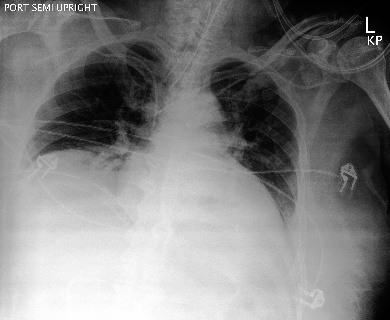

In [16]:
idx_to_img(rand_idx())

In [17]:
for trial in range(10):
    img_idx = rand_idx()
    print(f"{img_idx:<10} {idx_to_img(img_idx).size}")

120853     (369, 320)
200131     (384, 320)
85496      (369, 320)
28062      (389, 320)
143409     (390, 320)
87823      (320, 320)
68411      (390, 320)
178860     (390, 320)
222600     (390, 320)
11544      (369, 320)


#### <span style="background-color:#fff5b1"> The short-asix of all images is 320. </span>

In [18]:
for trial in range(10):
    img_idx = rand_idx(df=org_train_df)
    print(f"{img_idx:<10} {idx_to_img(img_idx, df=org_train_df).size}")

180170     (2828, 2320)
75410      (2828, 2320)
135595     (2828, 2320)
45041      (2828, 2320)
209686     (2828, 2320)
161100     (2828, 2320)
192372     (3043, 2800)
207371     (2828, 2320)
127568     (3408, 2800)
31799      (2828, 2320)


#### <span style="background-color:#fff5b1"> The original version. </span>

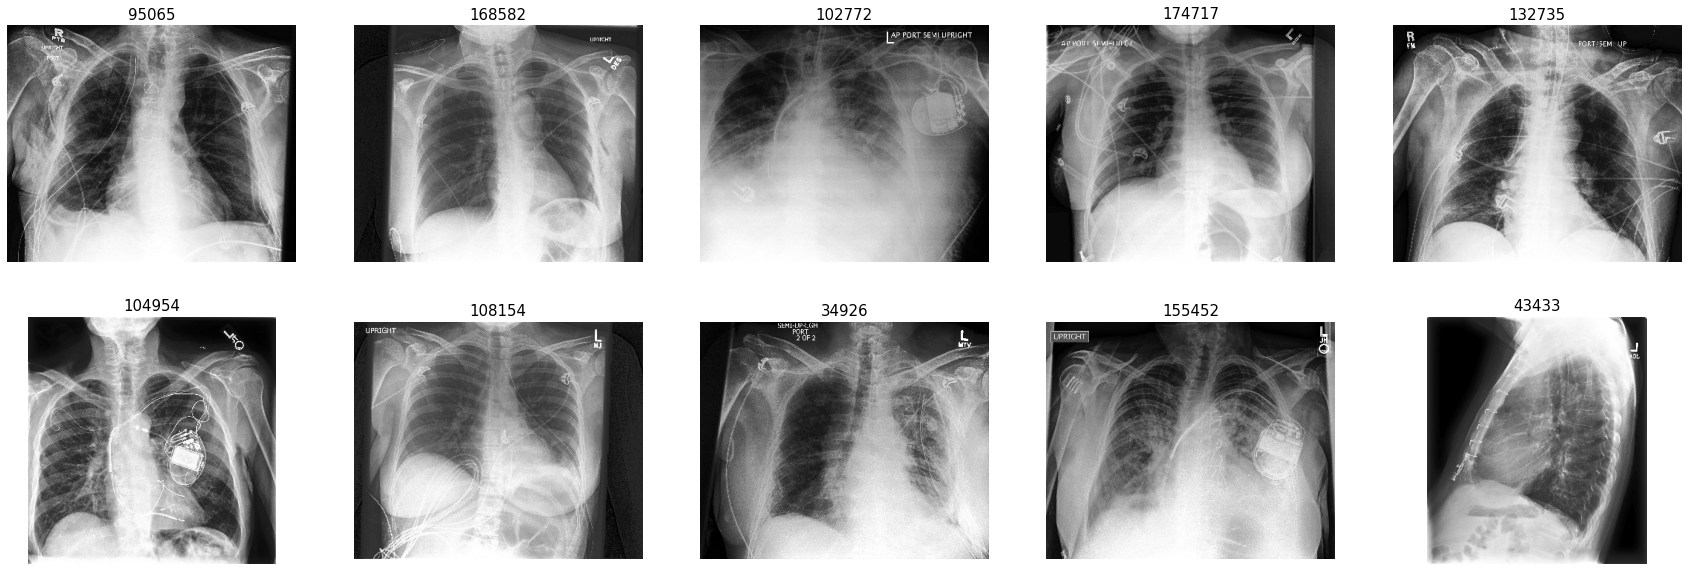

In [19]:
rows, cols = 2, 5
img_idxs = [rand_idx() for x in range(rows*cols)]
multiple_plot(img_idxs, rows, cols)

# Additional resources
- CheXbert
- CheXlocalize
- CheXpert Demo
- CheXphoto

# Data Errors

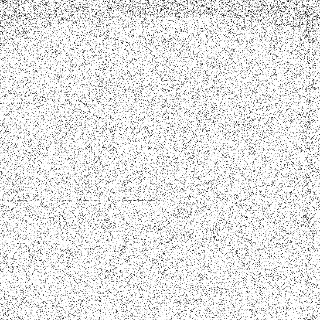

In [20]:
idx_to_img(104594)

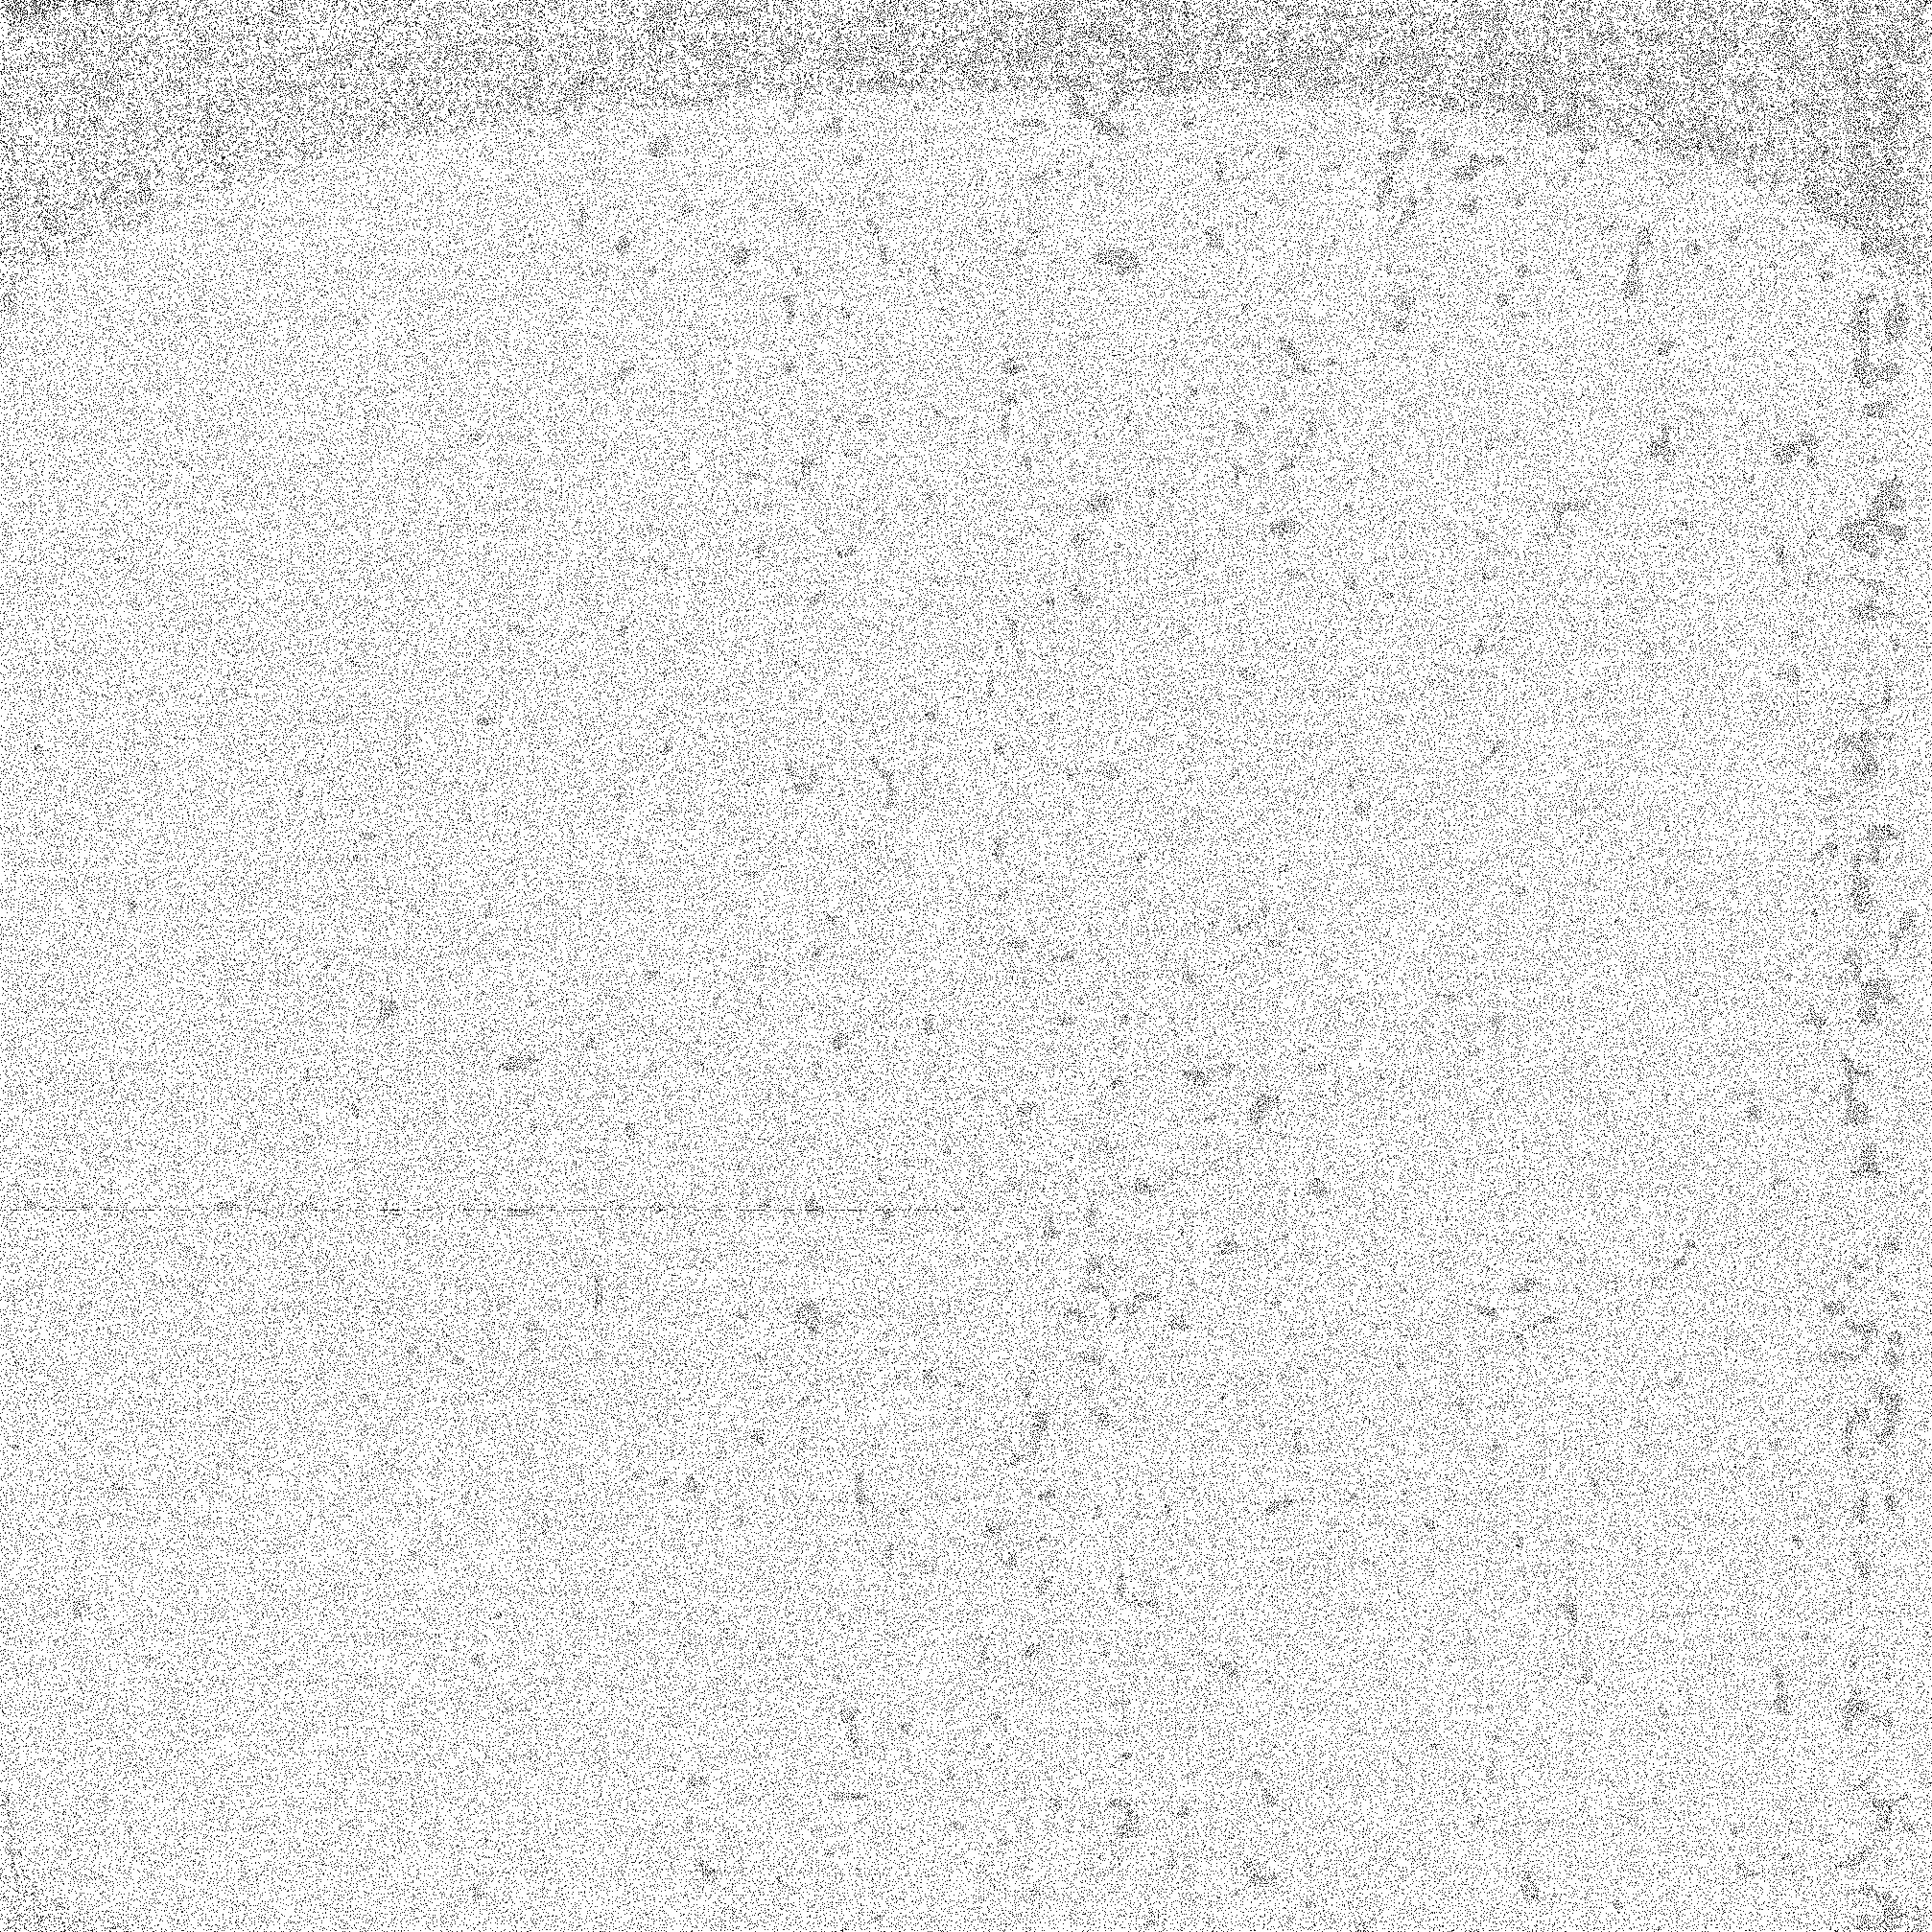

In [21]:
idx_to_img(104594, df=org_train_df)